My Photo Editor UI is divided into different frames. rightframe consists of image which will get modified whenever it is edited. leftframe consist of small original image and different operations that can be performed on it
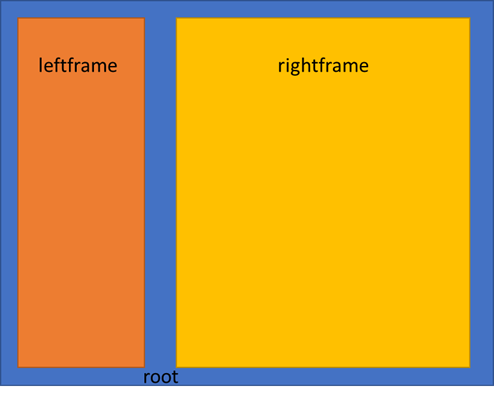

In [7]:
#loading all the required libraries
from tkinter import *
from tkinter import filedialog,messagebox
from PIL import Image,ImageEnhance
import os
import webbrowser


#main frame
root = Tk()
root.title("Photo Editor")
root.config(bg="skyblue")
root.geometry("800x600")


#division of main frame
leftframe=Frame(root, width=200, height=700,bg="skyblue")
leftframe.pack(side=LEFT,padx=5,pady=5)

rightframe=Frame(root, width=700, height=700)
rightframe.pack(side=RIGHT,padx=5,pady=5)

#frame in rightframe which will hold image being edited
original_image = Frame(leftframe, width=180, height=180,bg="white")
original_image.grid(row=0, column=0, padx=5, pady=5)

#frame for displaying original image
textframe = Frame(original_image, width=180, height=20,bg="blue")
textframe.grid(row=0, column=0, padx=5, pady=5)
imageframe = Frame(original_image, width=180, height=160)
imageframe.grid(row=1, column=0, padx=5, pady=5)
l2=Label(textframe,text="Original Image",bg="white")
l2.pack()

#frame which will consider editing buttons
tool_bar = Frame(leftframe, width=180, height=370,bg="skyblue")
tool_bar.grid(row=1, column=0, padx=5, pady=5)


#Function to destroy frame as it contains previously edited image. T
def destroywidget():
    for widget in rightframe.winfo_children():
        widget.destroy()
        
#This function will fill frame with recently edited image      
def canvasframe(l_img):
    l3 = Label(rightframe, image= l_img,width=700, height=700)
    l3.image =  l_img
    l3.pack()

#currently only png and gif images are supported
def openfile():
    global currimage
    file_path = filedialog.askopenfilename(filetypes=[('png images', '.png'),('gif images', '.gif')])
    image = PhotoImage(file=file_path)
    
#s_img will be in original image frame and l_img is the image on which modifications will be applied
    s_img=image.subsample(6,6)
    l_img=image.subsample(2,2)
    
    l1 = Label(imageframe, image=s_img,height=160,width=180)
    l1.image = s_img
    l1.pack()
    canvasframe(l_img)
    
#currimage is image object for pillow module to perform modifictaions
    currimage=Image.open(file_path)
   
    
def saveimg():
    
    def savef():
        name=str(e1.get())
#if the name enterned by user has .jpg then saving method was different than other types of files
        if(name[-3::1]=='jpg'):
             currimage.convert('RGB').save(name)
        else:
             currimage.save(name)
        currimage.close()
        window.destroy()
        root.destroy()
    
    window=Tk()
    window.title("Save As")
    window.geometry("300x100")
    l4=Label(window,text="File Name:",font=('Courier', 10))
    l4.pack(side=LEFT)
    e1=Entry(window,bd=3)
    e1.pack(side=LEFT)
    sbutton=Button(window,text="Save",font=('Courier', 10),borderwidth=5,command=savef,width=10)
    sbutton.pack(side=LEFT,padx=10)
    if os.path.exists('temp.png'):
        os.remove('temp.png')

def rotateimg():
    global currimage
    currimage=currimage.rotate(90,expand=True)
    currimage.save('temp.png')
    tempimg=PhotoImage(file='temp.png')
    l_img=tempimg.subsample(2,2)
    destroywidget()
    canvasframe(l_img)
   
    
def togrey():
    global currimage
    currimage=currimage.convert("L")
    currimage.save('temp.png')
    tempimg=PhotoImage(file='temp.png')
    l_img=tempimg.subsample(2,2)
    destroywidget()
    canvasframe(l_img)
    
def resizeimg():
    #messagebox.showerror("Error", tool_bar.winfo_children())
    
    #print(window.winfo_exists())
    def res():
        global currimage
        l=e4.get()
        h=e5.get()
        while True:
            try:
                currimage=currimage.resize((int(l),int(h)))
                currimage.save('temp.png')
                tempimg=PhotoImage(file='temp.png')
                l_img=tempimg.subsample(2,2)
                destroywidget()
                canvasframe(l_img)
                window.destroy()
                break
            except:
                messagebox.showerror("Error", "Enter valid numbers")
             
    window=Tk()
    window.title("Resize")
    l4=Label(window,text="Length(px):",font=('Courier', 10))
    l4.grid(row=0, column=0)
    e4=Entry(window,bd=3)
    e4.grid(row=0, column=1)
    l5=Label(window,text="Height(px):",font=('Courier', 10))
    l5.grid(row=1, column=0)
    e5=Entry(window,bd=3)
    e5.grid(row=1, column=1)
    subbutton=Button(window,text="Resize",font=('Courier', 10),borderwidth=5,command=res,width=10)
    subbutton.grid(row=2, column=1)

def openurl():
    webbrowser.open_new_tab('https://www.befunky.com/learn/tutorials/')
    
def adjustsharpness():
    global currimage
    enhancer=ImageEnhance.Sharpness(currimage.convert('RGB'))
    currimage=enhancer.enhance(1)
    currimage.save("temp.png")
    tempimg=PhotoImage(file='temp.png')
    l_img=tempimg.subsample(2,2)
    destroywidget()
    canvasframe(l_img)
    
def adjustblur():
    global currimage
    enhancer=ImageEnhance.Sharpness(currimage.convert('RGB'))
    currimage=enhancer.enhance(-1)
    currimage.save("temp.png")
    tempimg=PhotoImage(file='temp.png')
    l_img=tempimg.subsample(2,2)
    destroywidget()
    canvasframe(l_img)
    
def adjustbrightness():
    global currimage
    enhancer=ImageEnhance.Brightness(currimage.convert('RGB'))
    currimage=enhancer.enhance(1)
    currimage.save("temp.png")
    tempimg=PhotoImage(file='temp.png')
    l_img=tempimg.subsample(2,2)
    destroywidget()
    canvasframe(l_img)

#code for creating photo editing buttons
openbutton=Button(tool_bar,text="Open",font=('Courier', 10),borderwidth=5,command=openfile,width=16)
openbutton.grid(row=0, column=0,pady=2)
savebutton=Button(tool_bar,text="Save",font=('Courier', 10),borderwidth=5,command=saveimg,width=16)
savebutton.grid(row=1, column=0,pady=2)
rotatebutton=Button(tool_bar,text="Rotate",font=('Courier', 10),command=rotateimg,borderwidth=5,width=16)
rotatebutton.grid(row=2, column=0,pady=2)
resizebutton=Button(tool_bar,text="Resize",font=('Courier', 10),command=resizeimg,borderwidth=5,width=16)
resizebutton.grid(row=3, column=0,pady=2)
greybutton=Button(tool_bar,text="Grey Image",font=('Courier', 10),command=togrey,borderwidth=5,width=16)
greybutton.grid(row=4, column=0,pady=2)
sharpnessbutton=Button(tool_bar,text="Sharpness",font=('Courier', 10),command=adjustsharpness,borderwidth=5,width=16)
sharpnessbutton.grid(row=5, column=0,pady=2)
blurbutton=Button(tool_bar,text="Blur",font=('Courier', 10),command=adjustblur,borderwidth=5,width=16)
blurbutton.grid(row=6, column=0,pady=2)
brightnessbutton=Button(tool_bar,text="Brightness",font=('Courier', 10),command=adjustbrightness,borderwidth=5,width=16)
brightnessbutton.grid(row=7, column=0,pady=2)
faqbutton=Button(tool_bar,text="Tutorials",font=('Courier', 10),command=openurl,borderwidth=5,width=16)
faqbutton.grid(row=8, column=0,pady=2)



root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Priyanka\Anaconda3\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "<ipython-input-7-6879b87cf933>", line 117, in resizeimg
    print(window.winfo_exists())
AttributeError: 'str' object has no attribute 'winfo_exists'
